In [0]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
import random
import warnings
warnings.filterwarnings("ignore")

In [0]:
from PIL import Image
from scipy import ndimage
import tensorflow as tf
from tensorflow.python.framework import ops

In [0]:
%matplotlib inline
np.random.seed(1)

In [0]:
#load data set from sklearn.datasets
from sklearn.datasets import load_digits

In [0]:
digits=load_digits()

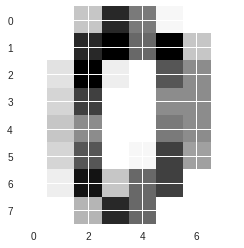

In [6]:
plt.imshow(digits.images[0])

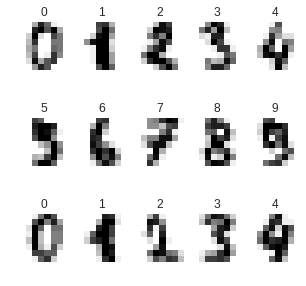

In [7]:
images_and_labels=list(zip(digits.images,digits.target))
plt.figure(figsize=(5,5))
for index,(image,label) in enumerate(images_and_labels[:15]):
    plt.subplot(3,5,index+1)
    plt.axis('off')
    plt.imshow(image,cmap=plt.cm.gray_r,interpolation='nearest')
    plt.title('%i' % label)

In [0]:
X=digits.images
y=digits.target

In [0]:
X=X.reshape(X.shape[0],X.shape[1],X.shape[2],1)

In [10]:
print(X.shape)

(1797, 8, 8, 1)


In [11]:
print(y.shape)

(1797,)


In [0]:
X=X/255

In [13]:
X[0]

array([[[0.        ],
        [0.        ],
        [0.01960784],
        [0.05098039],
        [0.03529412],
        [0.00392157],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.05098039],
        [0.05882353],
        [0.03921569],
        [0.05882353],
        [0.01960784],
        [0.        ]],

       [[0.        ],
        [0.01176471],
        [0.05882353],
        [0.00784314],
        [0.        ],
        [0.04313725],
        [0.03137255],
        [0.        ]],

       [[0.        ],
        [0.01568627],
        [0.04705882],
        [0.        ],
        [0.        ],
        [0.03137255],
        [0.03137255],
        [0.        ]],

       [[0.        ],
        [0.01960784],
        [0.03137255],
        [0.        ],
        [0.        ],
        [0.03529412],
        [0.03137255],
        [0.        ]],

       [[0.        ],
        [0.01568627],
        [0.04313725],
        [0.        ],
        [0.00392157],


In [14]:
y=y.reshape(y.shape[0],1)
print(y.shape)

(1797, 1)


In [0]:
y_encoded=np.zeros((y.shape[0],10))
for i in range(y_encoded.shape[0]):
    y_encoded[i][y[i][0]]=1
y=y_encoded.copy()

In [16]:
print(y.shape)

(1797, 10)


In [17]:
y[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [0]:
train_size=int(X.shape[0]*0.8)
test_size=X.shape[0]-train_size
train_indices=random.sample(range(0,X.shape[0]),train_size)
test_indices=[i for i in range(0,X.shape[0]) if i not in train_indices]
X_train=X[train_indices]
Y_train=y[train_indices]
X_test=X[test_indices]
Y_test=y[test_indices]

In [19]:
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1437
number of test examples = 360
X_train shape: (1437, 8, 8, 1)
Y_train shape: (1437, 10)
X_test shape: (360, 8, 8, 1)
Y_test shape: (360, 10)


In [0]:
def create_placeholders(n_H0,n_W0,n_C0,n_y):
    X=tf.placeholder(tf.float64,[None,n_H0,n_W0,n_C0])
    Y=tf.placeholder(tf.float64,[None,n_y])
    return X,Y

In [21]:
X_p,Y_p=create_placeholders(8,8,1,10)
print("X= "+ str(X_p))
print("Y= "+str(Y_p))

X= Tensor("Placeholder:0", shape=(?, 8, 8, 1), dtype=float64)
Y= Tensor("Placeholder_1:0", shape=(?, 10), dtype=float64)


In [0]:
def initialize_parameters():
    tf.set_random_seed(1)
    W1=tf.get_variable("W1",[4,4,1,8],dtype=tf.float64,initializer=tf.contrib.layers.xavier_initializer(seed=0))
    W2=tf.get_variable("W2",[2,2,8,16],dtype=tf.float64,initializer=tf.contrib.layers.xavier_initializer(seed=0))
    parameters={"W1":W1,"W2":W2}
    return parameters

In [23]:
tf.reset_default_graph()
with tf.Session() as sess_test:
    parameters = initialize_parameters()
    init = tf.global_variables_initializer()
    sess_test.run(init)
    print("W1 = " + str(parameters["W1"].eval()[1,1]))
    print("W2 = " + str(parameters["W2"].eval()[1,1,1]))


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Colocations handled automatically by placer.
W1 = [[-0.20177494  0.15629152 -0.04183559 -0.18772084 -0.03537321 -0.018062
   0.09998971  0.07257708]]
W2 = [-0.16205241  0.04356554  0.07628003  0.07753464  0.06825155 -0.24405832
  0.24469767 -0.19720941  0.07481825  0.19748661 -0.08642435 -0.10050062
  0.11679814  0.24573865  0.00760622  0.24272562]


In [0]:
def forward_propagation(X, parameters):
    W1 = parameters['W1']
    W2 = parameters['W2']
    Z1 = tf.nn.conv2d(X,W1,strides = [1,1,1,1], padding = 'SAME')
    A1 = tf.nn.relu(Z1)
    P1 = tf.nn.max_pool(A1, ksize = [1,8,8,1], strides = [1,8,8,1], padding = 'SAME')
    Z2 = tf.nn.conv2d(P1,W2,strides = [1,1,1,1], padding = 'SAME')
    A2 = tf.nn.relu(Z2)
    P2 = tf.nn.max_pool(A2, ksize = [1,4,4,1], strides = [1,4,4,1], padding = 'SAME')
    P2 = tf.contrib.layers.flatten(P2)
    Z3 = tf.contrib.layers.fully_connected(P2,10,activation_fn=None)
    return Z3

In [25]:
tf.reset_default_graph()
with tf.Session() as sess:
    np.random.seed(1)
    X_p,Y_p=create_placeholders(8,8,1,10)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X_p, parameters)
    init = tf.global_variables_initializer()
    sess.run(init)
    a = sess.run(Z3, {X_p: X_train, Y_p: Y_train})
    print("Z3 = " + str(a))

Instructions for updating:
Use keras.layers.flatten instead.
Z3 = [[-0.00311673 -0.00127475  0.00774744 ... -0.00184896 -0.00518212
   0.0002022 ]
 [-0.00396415  0.00127667  0.0093909  ... -0.00289099 -0.00692639
  -0.00104913]
 [-0.00420808  0.00152724  0.01076919 ... -0.00305362 -0.0073539
  -0.00201565]
 ...
 [-0.00279402 -0.00058951  0.0108746  ... -0.00126516 -0.00583444
  -0.00109296]
 [-0.00441616  0.00243     0.01257797 ... -0.00312168 -0.00806128
  -0.00304023]
 [-0.00472631  0.00274824  0.01071036 ... -0.00363661 -0.00793803
  -0.00233711]]


In [0]:
def compute_cost(Z3,Y):
  cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=Z3,labels=Y))
  return cost

In [28]:
tf.reset_default_graph()
with tf.Session() as sess:
    np.random.seed(1)
    X_p,Y_p=create_placeholders(8,8,1,10)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X_p, parameters)
    cost = compute_cost(Z3, Y_train)
    init = tf.global_variables_initializer()
    sess.run(init)
    a = sess.run(cost, {X_p: X_train, Y_p: Y_train})
    print("cost = " + str(a))

cost = 2.3024221392654862


In [0]:
def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    np.random.seed(seed)            
    m = X.shape[0]                  
    mini_batches = []
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[permutation]
    shuffled_Y = Y[permutation]
    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[k*mini_batch_size:(k+1)*mini_batch_size]
        mini_batch_Y = shuffled_Y[k*mini_batch_size:(k+1)*mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[(mini_batch_size*math.floor(m/mini_batch_size)):]
        mini_batch_Y = shuffled_Y[(mini_batch_size*math.floor(m/mini_batch_size)):]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [0]:
minibatches=random_mini_batches(X_train,Y_train,64,2)

In [35]:
minibatch=minibatches[0]
(minibatch_X,minibatch_Y)=minibatch
print(minibatch_X.shape)
print(minibatch_Y.shape)

(64, 8, 8, 1)
(64, 10)


In [0]:
def model(X_train,Y_train,X_test,Y_test,learning_rate=0.009,num_epochs=100,minibatch_size=64,print_cost=True):
  ops.reset_default_graph()
  tf.set_random_seed(1)
  seed=3
  #useful variables
  (m,n_H0,n_W0,n_C0)=X_train.shape
  n_y=Y_train.shape[1]
  costs=[]
  
  #create placeholders
  X,Y=create_placeholders(n_H0,n_W0,n_C0,n_y)
  
  #initialize parameters
  
  parameters=initialize_parameters()
  
  #forward propagation
  
  Z3= forward_propagation(X, parameters)
  
  # compute cost
  cost=compute_cost(Z3,Y)
  
  #Back proapagation
  optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)
  
  init=tf.global_variables_initializer()
  
  with tf.Session() as sess:
    sess.run(init)
    for epoch in range(num_epochs):
      minibatch_cost=0
      num_minibatches=int(m/minibatch_size)
      seed=seed+1
      minibatches=random_mini_batches(X_train,Y_train,minibatch_size,seed)
      for minibatch in minibatches:
        (minibatch_X,minibatch_Y)=minibatch
        _,temp_cost=sess.run([optimizer,cost],feed_dict={X:minibatch_X,Y:minibatch_Y})
        minibatch_cost+=(temp_cost/num_minibatches)
      if print_cost==True and epoch%5==0:
        print ("Cost after epoch %i: %f" % (epoch, minibatch_cost))
      if print_cost==True and epoch%1==0:
        costs.append(minibatch_cost)
        
    #plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    # Calculate the correct predictions
    predict_op = tf.argmax(Z3, 1)
    correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1))

    # Calculate accuracy on the test set
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print(accuracy)
    train_accuracy = accuracy.eval({X: X_train, Y: Y_train})
    test_accuracy = accuracy.eval({X: X_test, Y: Y_test})
    print("Train Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)
    
    
    
    return train_accuracy,test_accuracy,parameters

Cost after epoch 0: 2.406268
Cost after epoch 5: 1.848501
Cost after epoch 10: 1.131666
Cost after epoch 15: 0.875365
Cost after epoch 20: 0.747782
Cost after epoch 25: 0.687795
Cost after epoch 30: 0.623073
Cost after epoch 35: 0.587566
Cost after epoch 40: 0.556975
Cost after epoch 45: 0.521740
Cost after epoch 50: 0.495890
Cost after epoch 55: 0.464279
Cost after epoch 60: 0.449134
Cost after epoch 65: 0.421361
Cost after epoch 70: 0.408676
Cost after epoch 75: 0.392708
Cost after epoch 80: 0.377675
Cost after epoch 85: 0.375454
Cost after epoch 90: 0.354901
Cost after epoch 95: 0.343282


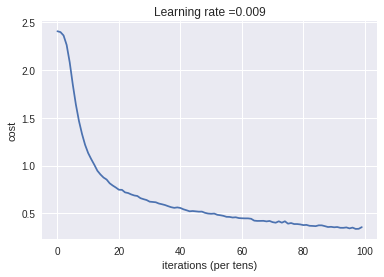

Tensor("Mean_1:0", shape=(), dtype=float32)
Train Accuracy: 0.8914405
Test Accuracy: 0.825


In [39]:
_, _, parameters = model(X_train, Y_train, X_test, Y_test)